# Adapted Attribute Types with Spawned Classes and Virtual Modules

**Purpose**: demonstrate using `dj.AttributeAdapter` for convenient storage of arbitrary data types in DataJoint table attributes when working with previously defined schemas.

This notebook works with the schema created previously in [Adapted-Types.ipynb](Adapted-Types.ipynb). Please execute it first, leaving the `Connection` table defined and populated.

Also, see [Spawning-Classes.ipynb](Spawning-Classes.ipynb) for a review of `schema.spawn_missing_classes` and `dj.create_virtual_module`. 

In [1]:
import networkx as nx
import datajoint as dj

Let's connect to the schema defined in [Adapted-Types.ipynb](Adapted-Types.ipynb).

In [2]:
schema = dj.schema('test_graphs')

Connecting dbadmin@dimitri-proj0.cda95qzjbnvs.us-east-1.rds.amazonaws.com:3306


To work with the `<graph>` type used in that schema we need to define or import the adapter object *before* `spawn_missing_classes`:

In [3]:
class GraphAdapter(dj.AttributeAdapter):
    
    attribute_type = 'longblob'   # this is how the attribute will be declared
    
    def put(self, obj):
        # convert the nx.Graph object  into an edge list
        assert isinstance(obj, nx.Graph)
        return list(obj.edges)

    def get(self, value):
        # convert edge list back into an nx.Graph
        return nx.Graph(value)
    

# instantiate for use as a datajoint type
graph = GraphAdapter()

## Spawning missing classes in the local namespace

Now spawning missing classes will have the type adapter accessible:

In [4]:
schema.spawn_missing_classes()

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt

result = Connectivity.fetch('conn_graph', order_by='conn_id')

fig, axx = plt.subplots(1, result.size , figsize=(15, 3))
for g, ax in zip(result, axx.flatten()):
    plt.sca(ax)
    nx.draw(g)

NameError: name 'Connectivity' is not defined

## Creating a virtual module with adapted attribute types

To allow adapted attribyte types in virtual modules, they must be passed into the virtual module using the `add_objects` argument:

In [6]:
vmod = dj.create_virtual_module('vmod', 'test_graphs', add_objects={'graph': graph})

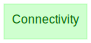

In [7]:
dj.Diagram(vmod)

/home/dimitri/.local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


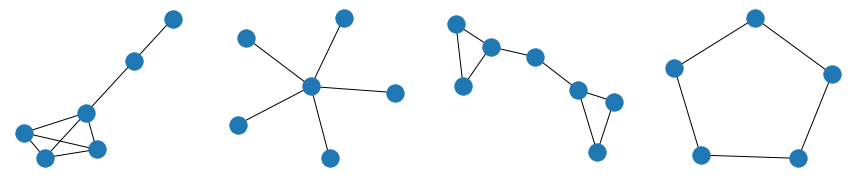

In [8]:
result = vmod.Connectivity.fetch('conn_graph', order_by='conn_id')

fig, axx = plt.subplots(1, result.size , figsize=(15, 3))
for g, ax in zip(result, axx.flatten()):
    plt.sca(ax)
    nx.draw(g)